In [221]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.base import BaseEstimator 
from  sklearn.model_selection  import  cross_val_predict 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.ensemble import RandomForestClassifier




In [222]:
class Never5Classifier(BaseEstimator):  
    def fit(self, X, y=None):  
        pass  
    def predict(self, X):        
        return np.zeros((len(X), 1), dtype=bool)

In [223]:
# Charger le jeu de données MNIST
mnist = fetch_openml(name='mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

In [224]:
X.shape


(70000, 784)

In [225]:
y.shape

(70000,)

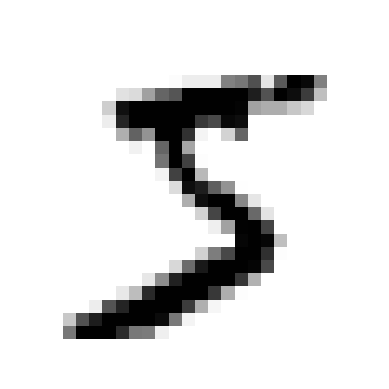

In [226]:
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show()



In [227]:
# Définir les ensembles X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Effectuer la permutation sur les données d'entraînement
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index].to_numpy(), y_train.iloc[shuffle_index].to_numpy()


In [228]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [229]:
sgd_clf = SGDClassifier(random_state=42)  
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [230]:
sgd_clf.predict([some_digit]) 

array([ True])

In [231]:
# Effectuer la validation croisée
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(cv_scores)

[0.95375 0.96065 0.964  ]


In [232]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9108 , 0.91085, 0.9073 ])

In [233]:
y_train_pred  =  cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 

In [234]:
confusion_matrix(y_train_5, y_train_pred) 

array([[53708,   871],
       [ 1561,  3860]], dtype=int64)

In [235]:
precision_score(y_train_5, y_train_pred) 


0.8158951595857112

In [236]:
recall_score(y_train_5, y_train_pred) 


0.7120457480169711

In [237]:
sgd_clf.fit(X_train, y_train) # y_train, pas y_train_5 
sgd_clf.predict([some_digit]) 

array(['5'], dtype='<U1')

In [238]:

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))  
ovo_clf.fit(X_train, y_train) 
ovo_clf.predict([some_digit]) 
len(ovo_clf.estimators_)  

45

In [239]:
# Créer un RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
forest_clf.fit(X_train, y_train)

# Faire une prédiction sur l'observation some_digit
prediction = forest_clf.predict([some_digit])

# Afficher la prédiction
print(prediction)

['5']


In [240]:
forest_clf.predict_proba([some_digit]) 

array([[0.  , 0.01, 0.01, 0.06, 0.01, 0.89, 0.  , 0.02, 0.  , 0.  ]])

In [241]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8676 , 0.89115, 0.86855])